In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import MaxPooling2D
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
plt.style.use({'figure.facecolor':'white'})

In [2]:
data = pd.read_csv("Movies-Poster_Dataset/train.csv")
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
image_height, image_width = 350, 350
store_list = []
for i in tqdm(range(data.shape[0])):
    path = 'Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
    image_check = image.load_img(path, target_size=(image_height, image_width))
    image_check = image.img_to_array(image_check)
    image_check = image_check / 255
    store_list.append(image_check)

x = np.array(store_list)
y = data.drop(columns=['Id', 'Genre'])
y = y.to_numpy()

print(x[:1])
print(y[:1])

100%|██████████| 7254/7254 [00:13<00:00, 543.36it/s]


[[[[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00784314 0.00784314 0.00784314]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00784314 0.00784314 0.00784314]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00784314 0.00784314 0.00784314]]

  ...

  [[0.11372549 0.11372549 0.11372549]
   [0.00784314 0.00784314 0.00784314]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.00392157 0.00392157 0.        ]
   [0.00392157 0.00392157 0.        ]
   [0.00784314 0.00784314 0.        ]]

  [[0.11372549 0.11372549 0.11372549]
   [0.0

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.2)
print('Done.')

Done.


In [11]:
# model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=x_train[0].shape))
# model.add(BatchNormalization())
# model.add(MaxPool2D(2, 2))
# model.add(Dropout(0.3))
#
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(2, 2))
# model.add(Dropout(0.3))
#
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(2, 2))
# model.add(Dropout(0.4))
#
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(2, 2))
# model.add(Dropout(0.5))
#
# model.add(Flatten())
#
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
#
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Dense(25, activation='sigmoid'))

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=x_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 346, 346, 16)      1216      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 173, 173, 16)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 173, 173, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 169, 169, 32)      12832     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 84, 84, 32)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 84, 84, 32)       

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Done.')

Done.


In [13]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
91/91 [==============================] - 310s 3s/step - loss: 0.3879 - accuracy: 0.1425 - val_loss: 0.2614 - val_accuracy: 0.1902

In [14]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print("Original model: ")
print("Loss:", loss)
print("Accuracy:", acc)

46/46 [==============================] - 10s 220ms/step - loss: 0.2342 - accuracy: 0.3019

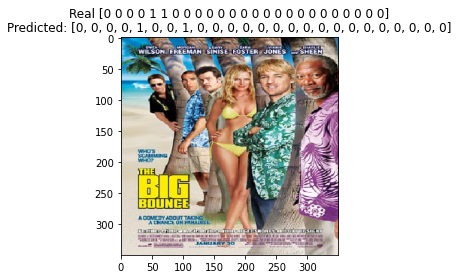

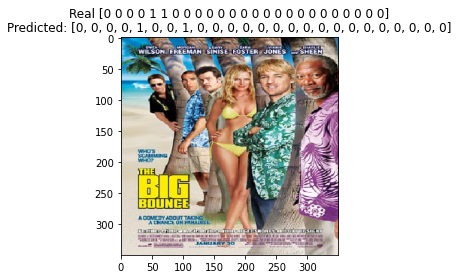

In [33]:
plt.style.use({'figure.facecolor':'white'})

plt.imshow(x_test[0])
prediction = model.predict(x_test)
plt.title('Real ' + str(y_test[0]) + '\nPredicted: ' + str([1 if x > 0.4 else 0 for x in prediction[0]]))
plt.show()